<a href="https://colab.research.google.com/github/cristobalvch/DataScience-For-Business/blob/main/Marketing-Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TAREA #1: ENTENDER EL ENUNCIADO DEL PROBLEMA Y EL CASO PRÁCTICO


<table>
  <tr><td>
    <img src="https://drive.google.com/uc?id=1OjWCpwRHlCSNYaJoUUd2QGryT9CoQJ5e"
         alt="Fashion MNIST sprite"  width="1000">
  </td></tr>
  <tr><td align="center">
    <b>Figura 1. Segmentación de Clientes
  </td></tr>
</table>


![alt text](https://drive.google.com/uc?id=1TlILFEVGZHessjmKkUMWL4NHlZ0DcHQb)

![alt text](https://drive.google.com/uc?id=1KaI1zjhARTFAs6X6VwqdsYZecd5EYDMw)

![alt text](https://drive.google.com/uc?id=1Q46sKROZf7jqKus0TfL7agQ5ZnzECiws)

![alt text](https://drive.google.com/uc?id=1zJX7y-J2jhIL17Lh7OroOZvrlblI0u1s)

![alt text](https://drive.google.com/uc?id=1L03HfNPXpLdLlKHk_I6FIj_ahPCuPL0S)

![alt text](https://drive.google.com/uc?id=1i-OPyUph2PGuuZ5FtN0hGX3BkEXCAQNM)

Data Source: https://www.kaggle.com/arjunbhasin2013/ccdata

# TAREA #2: IMPORTAR LAS LIBRERÍAS Y LOS DATASETS

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA


In [2]:
# Necesitarás montar tu disco usando los siguientes comandos:
# Para obtener más información sobre el montaje, consulta esto: https://stackoverflow.com/questions/46986398/import-data-into-google-colaboratory

#from google.colab import drive
#drive.mount('/content/drive')

In [3]:
# Incluye el link al archivo CSV donde has almacenado tu dataset

# CUSTID: Identificación del titular de la tarjeta de crédito
# BALANCE: Cantidad de saldo que queda en la cuenta del cliente para hacer compras
# BALANCE_FREQUENCY: Frecuencia de la actualización del saldo, puntuación entre 0 y 1 (1 = actualizado con frecuencia, 0 = no actualizado con frecuencia)
# PURCHASES: Cantidad de compras realizadas desde la cuenta
# ONEOFFPURCHASES: Importe máximo de compra realizado en una sola vez
# INSTALLMENTS_PURCHASES: Importe de la compra realizada en cuotas
# hola: Anticipo otorgado al usuario
# PURCHASES_FREQUENCY: frecuencia con la que se realizan las compras, puntuación entre 0 y 1 (1 = compras frecuentes, 0 = compras no frecuentes)
# PURCHASES_FREQUENCY: Frecuencia de las Compras se están realizando, puntuación entre 0 y 1 (1 = compra con frecuencia, 0 = no compra con frecuencia)
# ONEOFF_PURCHASES_FREQUENCY: Con qué frecuencia las compras se realizan de una sola vez (1 = compra con frecuencia, 0 = no compra con frecuencia)
# PURCHASES_INSTALLMENTS_FREQUENCY: Con qué frecuencia se realizan las compras a plazos (1 = se realizan con frecuencia, 0 = no se realizan con frecuencia)
# CASH_ADVANCE_FREQUENCY: con qué frecuencia el gasto se paga por adelantado
# CASH_ADVANCE_TRX: número de transacciones realizadas con "Efectivo por adelantado"
# PURCHASES_TRX: número de transacciones de compras realizadas
# CREDIT_LIMIT: límite de tarjeta de crédito para el usuario
# PAYMENTS: Número de pagos realizados por el usuario
# MINIMUM_PAYMENTS: cantidad mínima de pagos realizados por el usuario
# PRC_FULL_PAYMENT: porcentaje del pago total pagado por el usuario
# TENURE: Años que el usuario lleva usando el servicio de tarjeta de crédito

df = pd.read_csv('https://raw.githubusercontent.com/joanby/ds4b/main/2.%20Marketing%20Department/Marketing_data.csv')

In [4]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [6]:
# El balance medio es $1564 
# La frecuencia del balance se actualiza bastante a menudo, en promedio ~0.9
# El promedio de las compras es $1000
# El importe máximo de compra no recurrente es en promedio ~$600
# El promedio de la frecuencia de las compras está cerca de 0.5
# El promedio de ONEOFF_PURCHASES_FREQUENCY, PURCHASES_INSTALLMENTS_FREQUENCY, y CASH_ADVANCE_FREQUENCY es en general bajo
# El promedio del límite de crédito es ~ 4500
# El porcentaje de pago completo es 15%
# Los clientes llevan de promedio en el servicio 11 años
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [7]:
# Vamos a investigar quien ha hecho una compra de $40761!
df[df['ONEOFF_PURCHASES'].isin([df['ONEOFF_PURCHASES'].max()])]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
550,C10574,11547.52001,1.0,49039.57,40761.25,8278.32,558.166886,1.0,1.0,0.916667,0.083333,1,101,22500.0,46930.59824,2974.069421,0.25,12


In [8]:
# Vamos a ver quien pago por anticipado $47137!
# Este cliente hizo un total de 123 transacciones por adelantado!!
# Nunca paga sus compras completamente con la tarjeta
df[df['CASH_ADVANCE'].isin([df['CASH_ADVANCE'].max()])]


,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
2159,C12226,10905.05381,1.0,431.93,133.5,298.43,47137.21176,0.583333,0.25,0.5,1.0,123,21,19600.0,39048.59762,5394.173671,0.0,12


# TAREA #3: VISUALIZACIÓN DEL DATASET

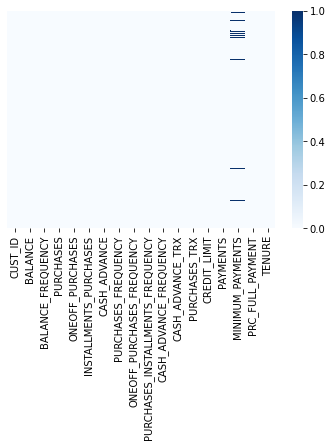

In [9]:
# Comprobemos a ver si tenemos datos faltantes, esperemos que no!
sns.heatmap(df.isnull(),yticklabels=False,annot=False,cmap='Blues')
plt.show()

In [10]:
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [11]:
# Vamos a rellenar los datos faltantes con el promedio del campo 'MINIMUM_PAYMENT' 
df['MINIMUM_PAYMENTS'] = df['MINIMUM_PAYMENTS'].fillna(df['MINIMUM_PAYMENTS'].mean())

In [12]:
# Vamos a rellenar los datos faltantes con el promedio del campo 'CREDIT_LIMIT' 
df['CREDIT_LIMIT'] = df['CREDIT_LIMIT'].fillna(df['CREDIT_LIMIT'].mean())

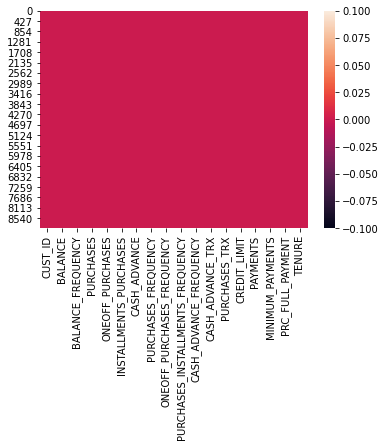

In [13]:
sns.heatmap(df.isnull())

In [14]:
# Varifiquemos si tenemos entradas duplicadas en nuestros datos 
df.duplicated().sum()

0

In [15]:
# Podemos deshacernos del campo Customer ID ya que no nos sirve para nada 
df.drop(['CUST_ID'],axis=1,inplace=True)

In [16]:
df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [17]:
df.shape

(8950, 17)

In [18]:
df.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

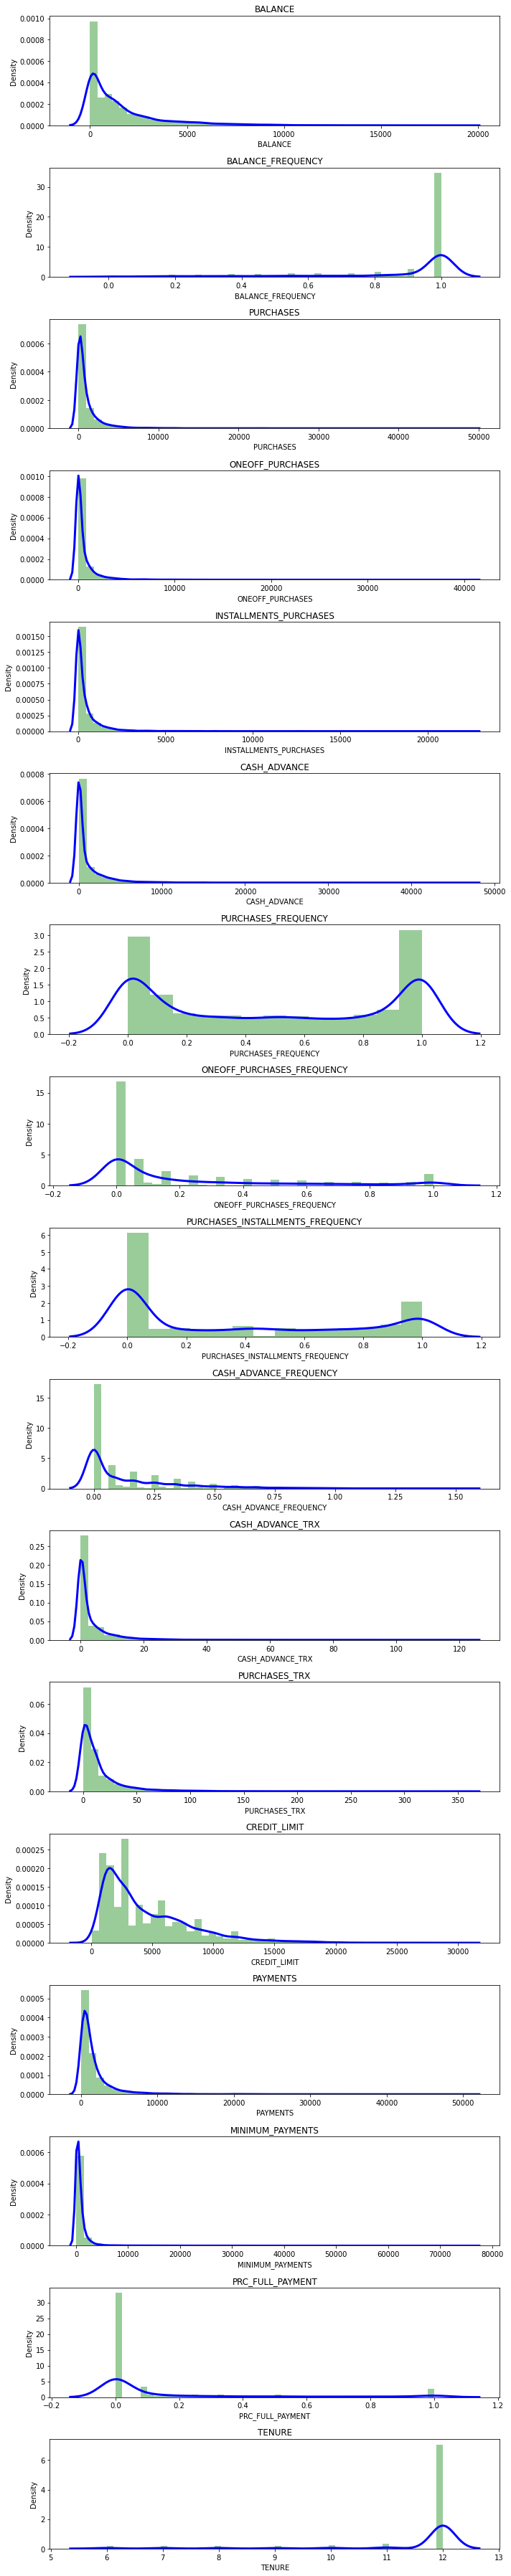

In [19]:
# distplot combina la función matplotlib.hist con la de seaborn kdeplot()
# KDE Plot representa la Kernel Density Estimate
# KDE se utiliza para visualizar la densidad de una probabilidad de una variable continua. 
# KDE nos muestra la densidad de una probabilidad para diferentes valores de una variable continua. 

# El balance promedio es  $1500
# 'Balance_Frequency' para muchos usuarios se actualiza muy frecuentemente ~1
# Para el campo 'PURCHASES_FREQUENCY', hay dos grupos diferentes de clientes
# Para los campos 'ONEOFF_PURCHASES_FREQUENCY' y 'PURCHASES_INSTALLMENT_FREQUENCY' la gran mayoría de usuarios no pagan todo de golpe ni a plazos
# Muy pocos clientes pagan su deuda al completo 'PRC_FULL_PAYMENT'~0
# El promedio del límite del crédito está entorno de los $4500
# La mayoría de clientes llevan ~11 años usando el servicio

n = len(df.columns)
plt.figure(figsize = (10, 50))
for i in range(n):
    plt.subplot(n, 1, i+1)
    sns.distplot(df[df.columns[i]], kde_kws = {"color": "b", "lw": 3, "label": "KDE"}, hist_kws={"color": "g"})
    plt.title(df.columns[i])

plt.tight_layout()
plt.show()

In [20]:
# sns.pairplot(creditcard_df)
# Hay correlación entre 'PURCHASES' y ONEOFF_PURCHASES & INSTALMENT_PURCHASES 
# Se ve una tendencia entre 'PURCHASES' y 'CREDIT_LIMIT' & 'PAYMENTS'
correlations = df.corr()

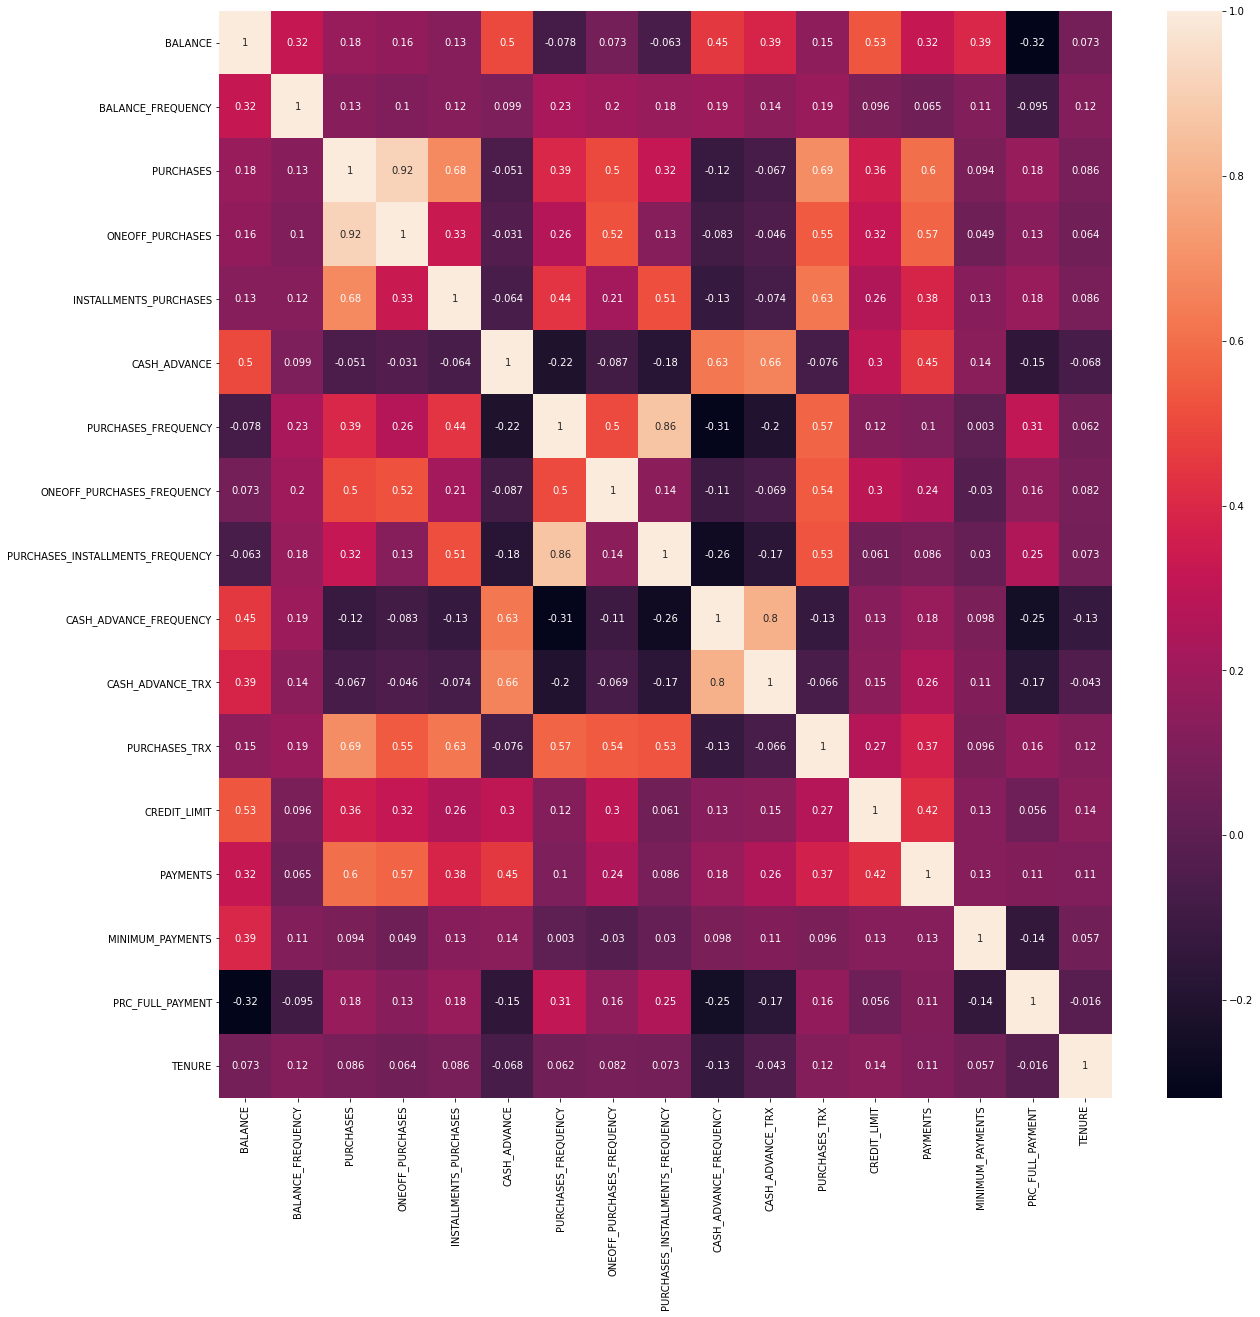

In [21]:

# 'PURCHASES' tienen una alta correlación con one-off purchases, 'installment purchases, purchase transactions, credit limit y payments. 
# Correlación positiva muy elevada entre 'PURCHASES_FREQUENCY' y 'PURCHASES_INSTALLMENT_FREQUENCY'
plt.figure(figsize=(20,20))
sns.heatmap(correlations,annot=True)
plt.show()

# TAREA #4: ENTENDER LA TEORÍA DETRÁS DE K-MEANS

![alt text](https://drive.google.com/uc?id=1T2vAOTCInx9l2S9b9H5xm-__h-RLRY5s)

![alt text](https://drive.google.com/uc?id=1eXSerp2FQpxhAa355hKeVT0-tY94ixsw)

![alt text](https://drive.google.com/uc?id=1D12cmll79HCx_Xbt3PSq51PnytJ7DhSr)

![alt text](https://drive.google.com/uc?id=1Syuco6pZ410oP6KbfgCH18s09eB4Hd2H)

![alt text](https://drive.google.com/uc?id=1DQ4KUV66YG-xnZ4xorQFgtkx5EbE2GLI)

![alt text](https://drive.google.com/uc?id=1LzWnRt2w1bLUBGJ7tRK-b4Xudbx54H3D)

![alt text](https://drive.google.com/uc?id=1orzdGxbZPiWlLZcI7EKHAmhnz7T41cV_)

![alt text](https://drive.google.com/uc?id=1ITLmp2XTCUFIM-BPpDWOYmfjxENxywer)

# TAREA #5: ENCONTRAR EL NÚMERO ÓPTIMO DE CLISTERS UTILIZANDO EL MÉTODO DEL CODO

In [41]:
# Empecemos por escalar primero el dataset
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

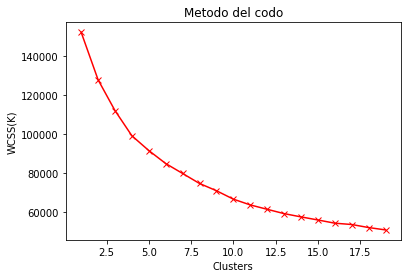

In [42]:
scores = list()
K_values = range(1,20)

for i in K_values:
  kmeans = KMeans(n_clusters=i)
  kmeans.fit(df_scaled)
  scores.append(kmeans.inertia_)

plt.plot(K_values,scores,'rx-')
plt.title('Metodo del codo')
plt.xlabel('Clusters')
plt.ylabel('WCSS(K)')
plt.show()

# Con el gráfico podemos ver que en 4 clusters es donde se forma el codo de la curva.
# Sin embargo, los valores no se reducen a una forma lineal hasta el 8º cluster. 
# Elijamos pues un número de clusters igual a 8.

# TAREA #6: APLICAR EL MÉTODO DE K-MEANS

In [43]:
kmeans = KMeans(8)
kmeans.fit(df_scaled)
labels = kmeans.labels_
centers = kmeans.cluster_centers_

In [46]:
# Para entender mejor estos valores, vamos a aplicar la transformación inversa.
cluster_centers = pd.DataFrame(data=centers,columns=df.columns)
cluster_centers = scaler.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data=cluster_centers,columns=df.columns)
cluster_centers
# Primer Cluster de Clientes (Transactors): Esos son los clientes que pagan la menor cantidad de cargos por intereses y tienen cuidado con su dinero, Clúster con el saldo más bajo ($ 104) y anticipo en efectivo ($ 303), Porcentaje de pago completo = 23%
# Segundo Cluster de Clientes (revolvers) que usan tarjeta de crédito como préstamo (sector más lucrativo): saldo más alto ($ 5000) y anticipo en efectivo (~ $ 5000), baja frecuencia de compra, alta frecuencia de anticipo en efectivo (0.5), transacciones de anticipo en efectivo alto (16) y bajo porcentaje de pago (3%)
# Tercer Cluster de Clientes (VIP/Prime): límite de crédito alto $ 16K y porcentaje más alto de pago completo, objetivo para aumentar el límite de crédito y aumentar los hábitos de gasto
# Cuarto Cluster de Clientes (low tenure): estos son clientes con baja antigüedad (7 años), saldo bajo


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,862.479700,0.794979,388.085586,236.917416,151.649711,1117.023571,0.409393,0.117161,0.275356,0.196706,3.250401,5.077047,2434.212599,595.544169,375.787595,0.157880,7.232745
1,1569.385721,0.972641,243.269635,193.817062,49.633383,752.333431,0.150168,0.085866,0.065620,0.152042,2.964925,2.780051,3362.300572,995.247024,833.095672,0.020269,11.883449
2,1268.661651,0.971920,2165.755656,1711.679964,454.075692,283.430840,0.885607,0.773428,0.432937,0.052471,0.985612,30.165468,6050.204382,2152.851572,491.149959,0.286620,11.876799
3,5018.108565,0.971290,521.374259,322.903650,198.583075,5105.566211,0.294995,0.137946,0.196092,0.514241,16.121681,7.870575,8184.960780,3994.849970,2053.496628,0.038073,11.618363
4,801.969686,0.955868,928.614176,191.577123,737.481692,216.006494,0.889688,0.088698,0.844020,0.040314,0.790443,19.434047,3549.263416,1110.200156,742.403482,0.246617,11.859632
5,5405.330935,0.957955,27276.363750,21877.102917,5399.260833,1550.378389,0.909028,0.842361,0.720833,0.059028,2.500000,127.958333,16083.333333,27925.634496,3266.671038,0.511206,11.916667
6,104.088618,0.368606,339.884300,202.217863,137.918176,308.802244,0.267350,0.069984,0.189781,0.030944,0.682782,4.283291,3857.667044,1176.492301,266.645252,0.237544,11.784563
7,3753.007505,0.987418,6272.077707,3537.571354,2736.163812,662.992396,0.957735,0.658321,0.870672,0.079395,2.248619,91.320442,9156.077348,5866.340526,2578.914000,0.223710,11.969613


In [47]:
df['clusters'] = labels

In [48]:
df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,clusters
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,1
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,3
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,2
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,1
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,1


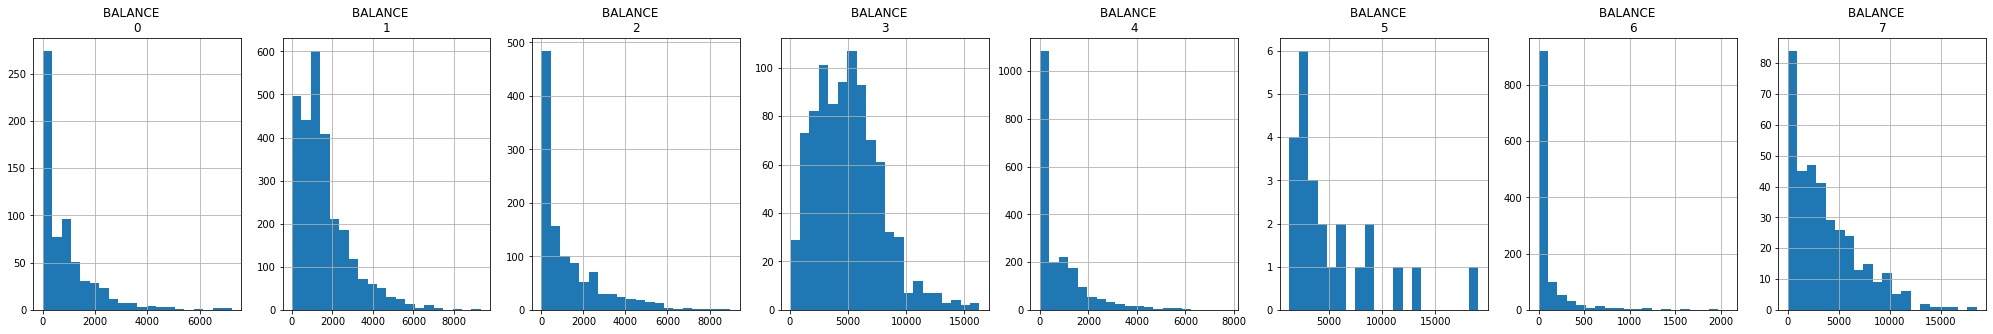

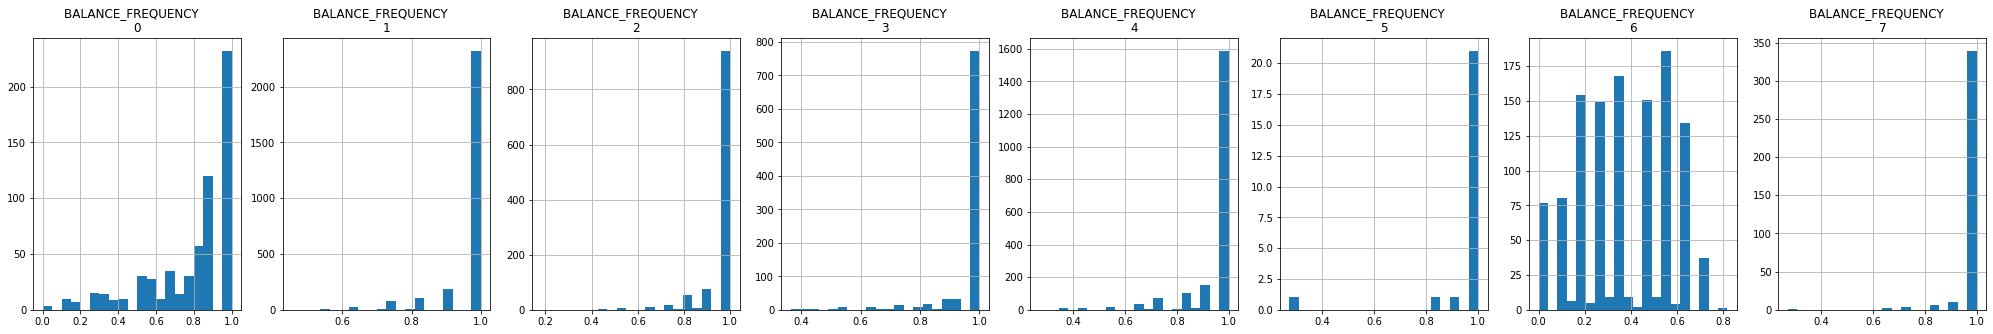

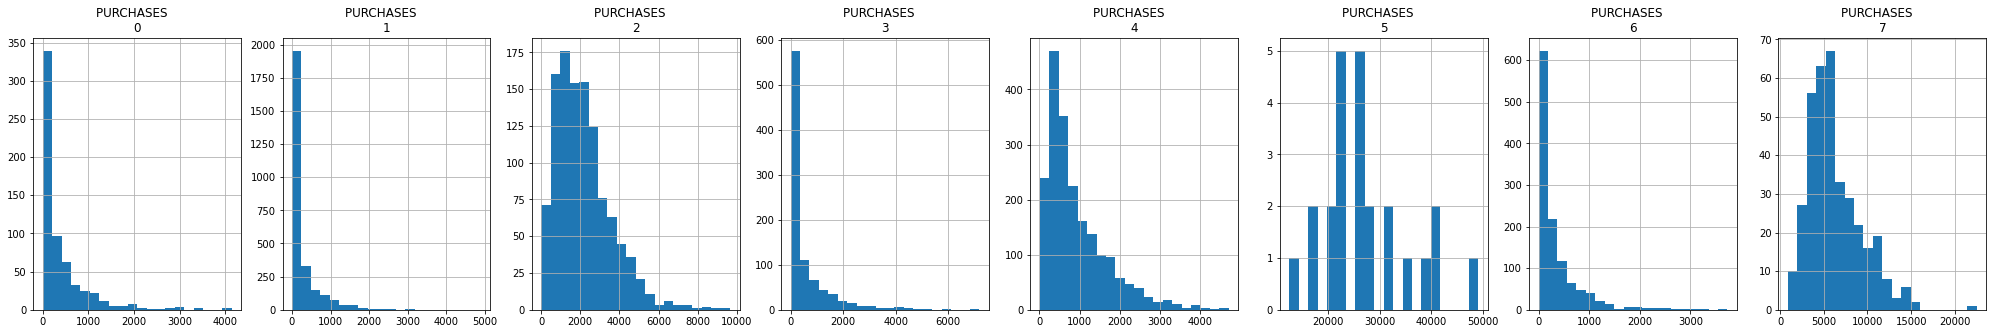

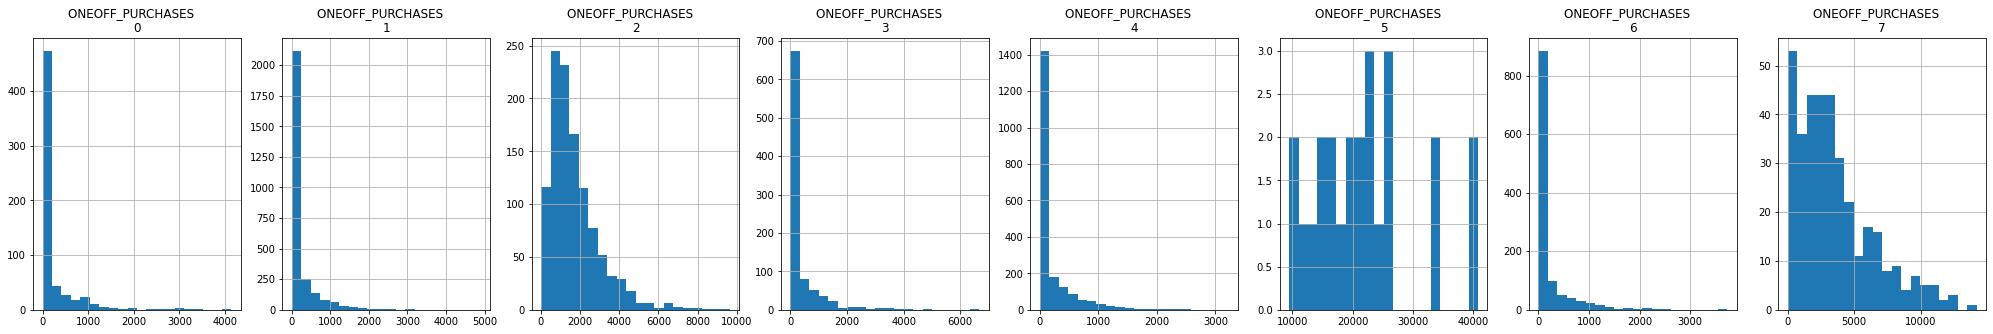

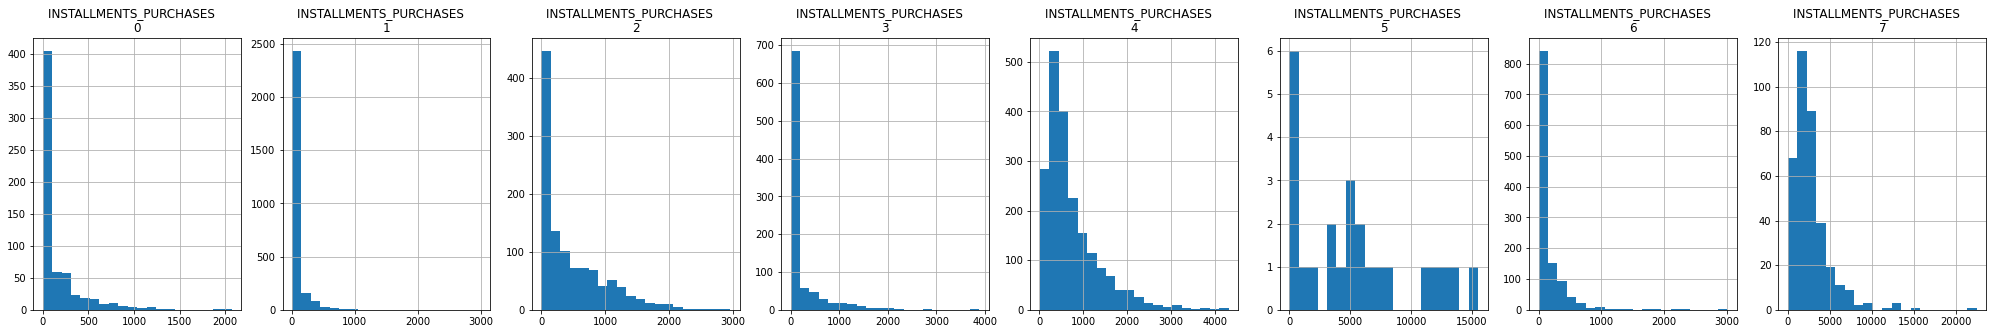

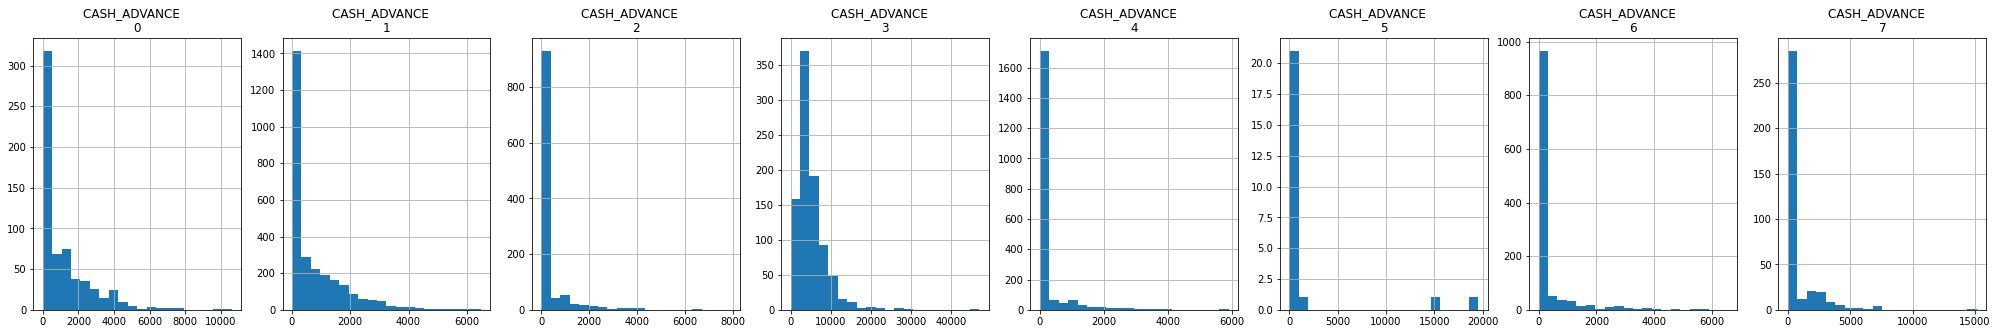

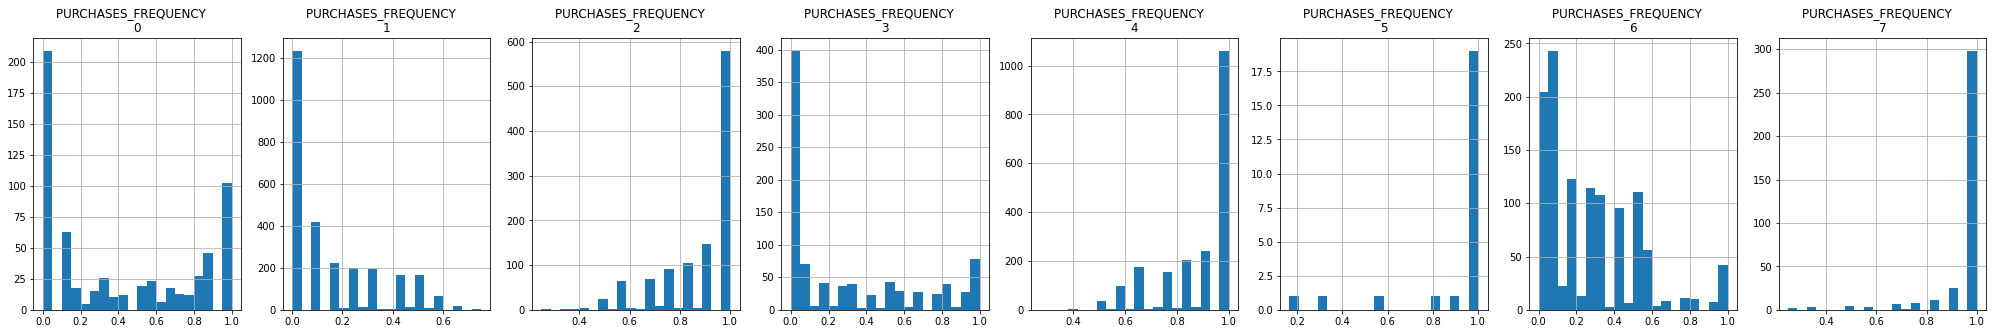

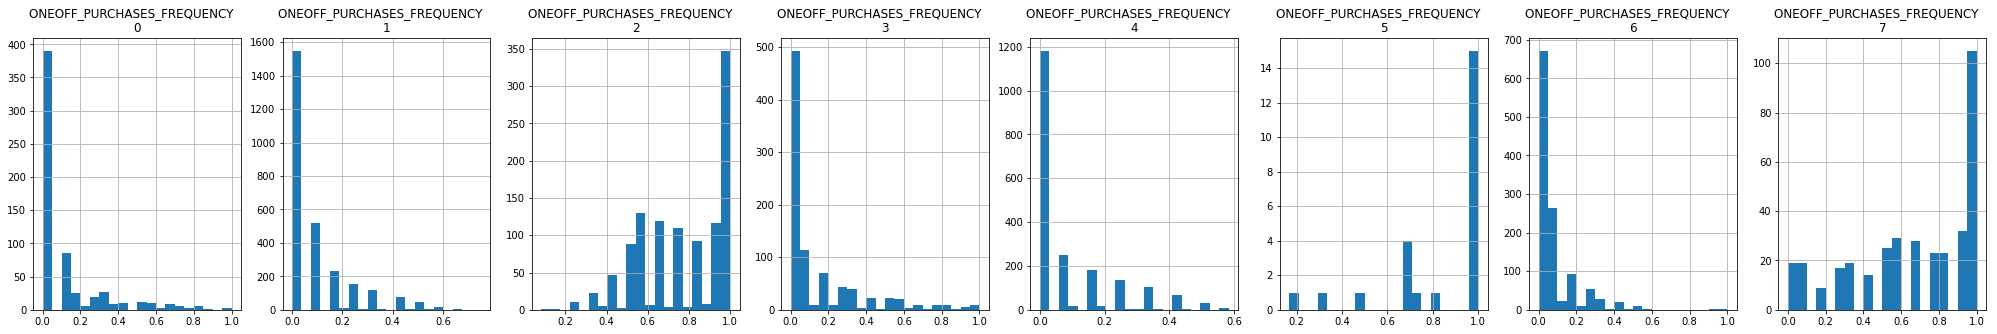

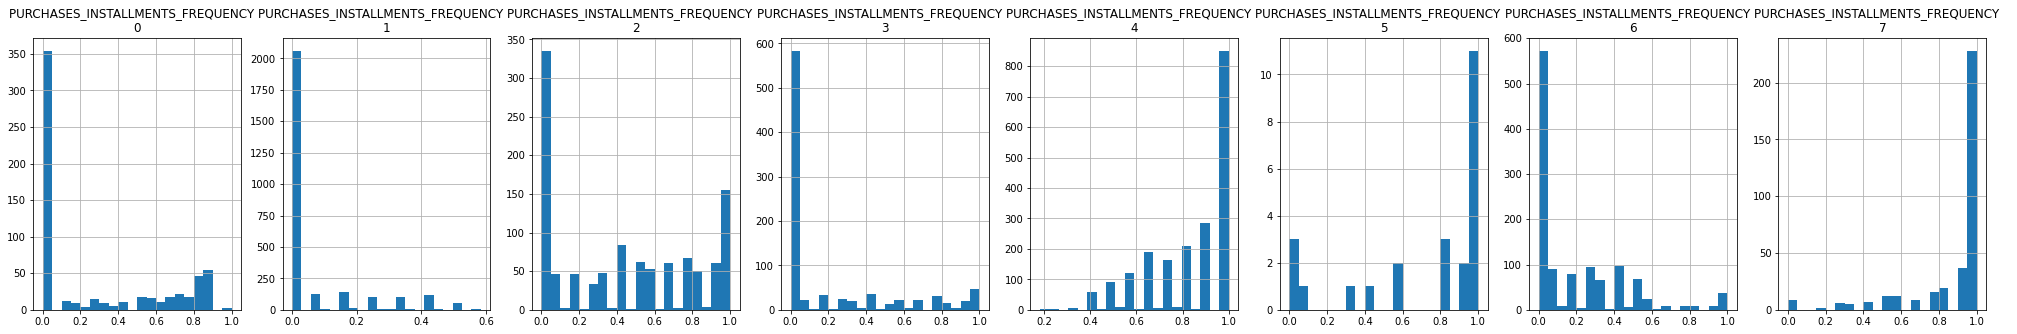

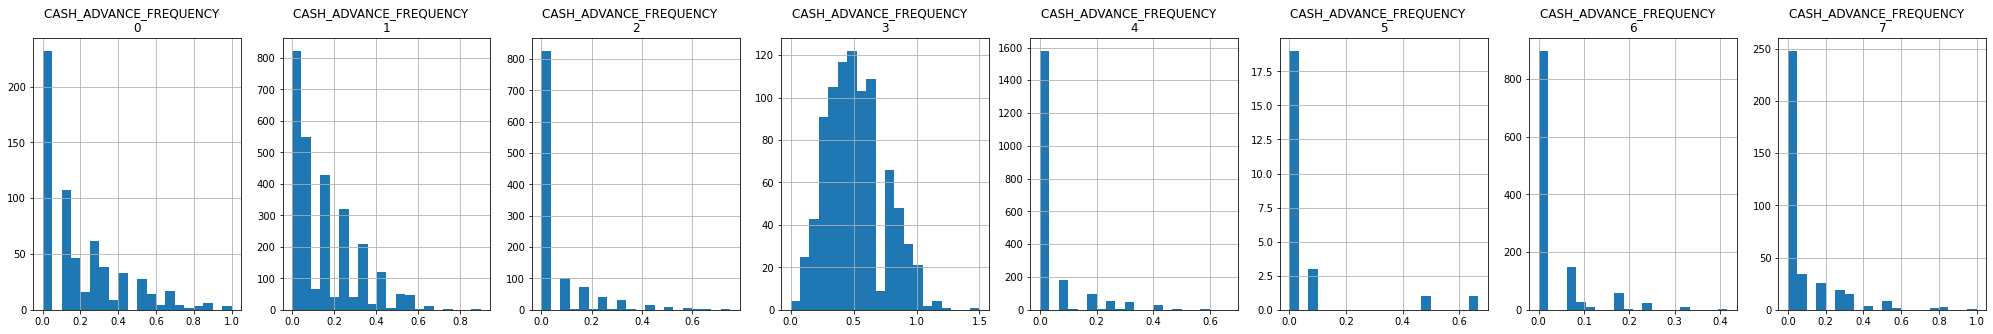

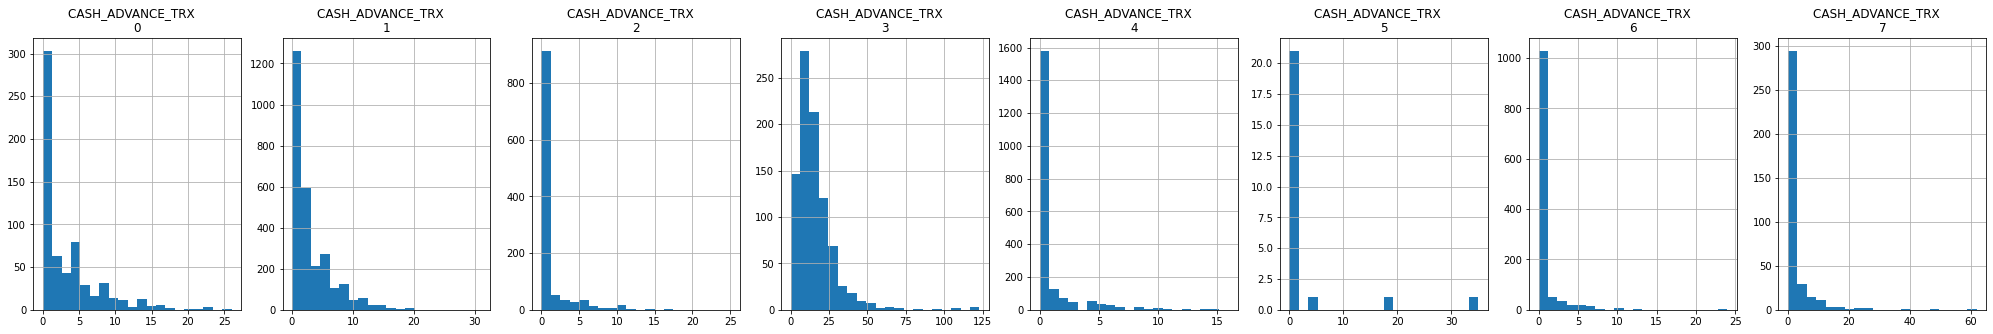

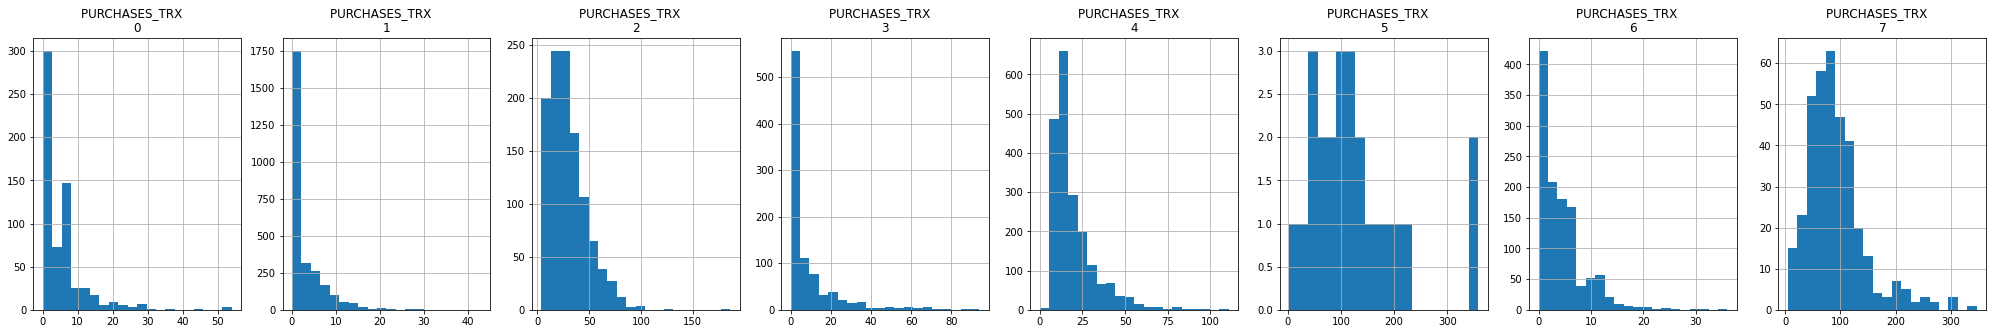

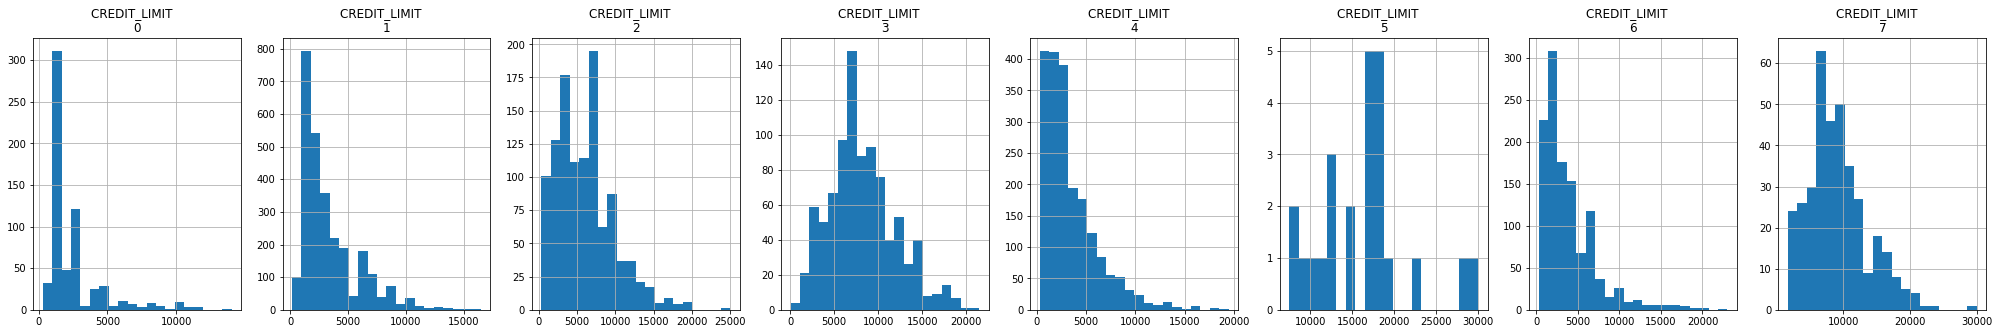

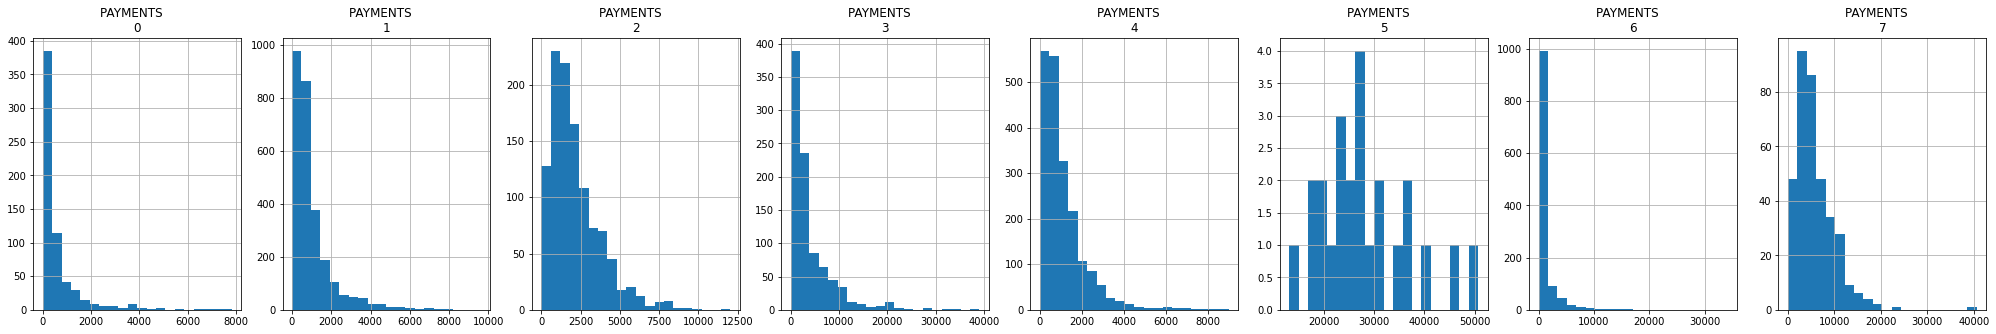

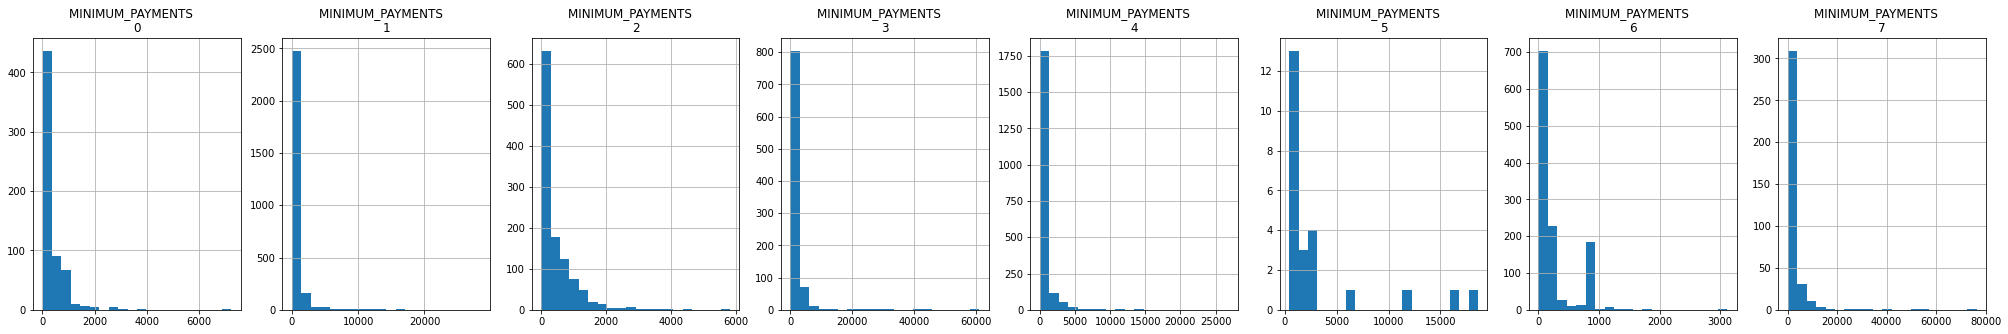

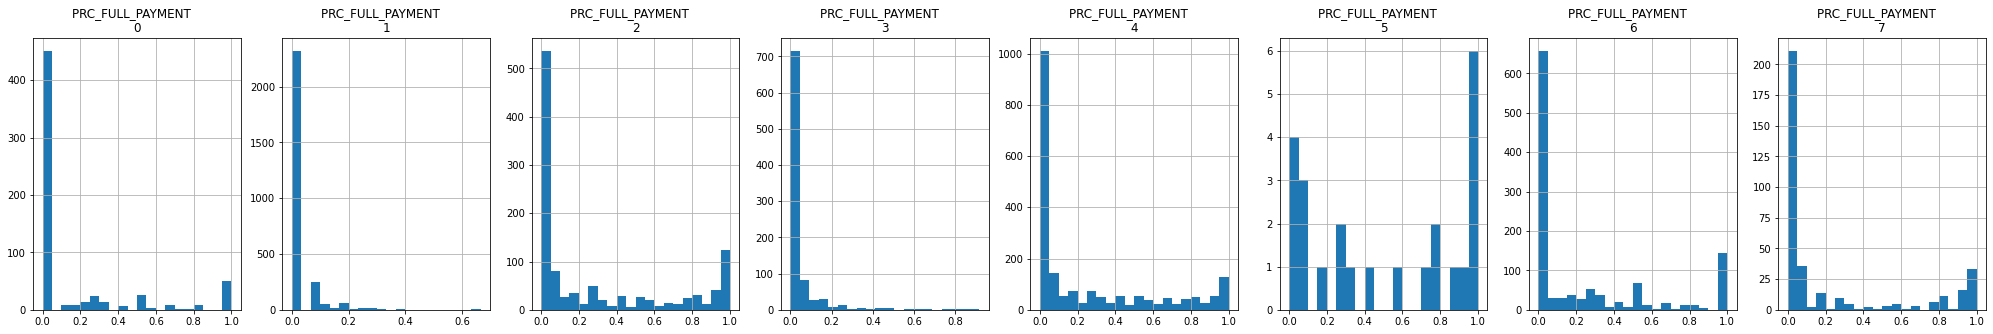

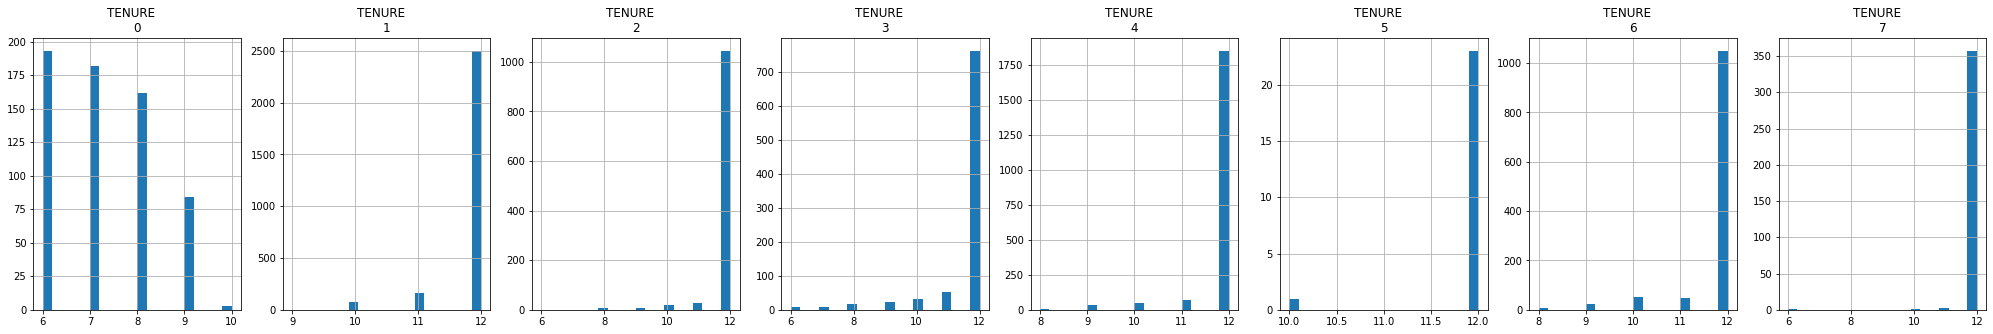

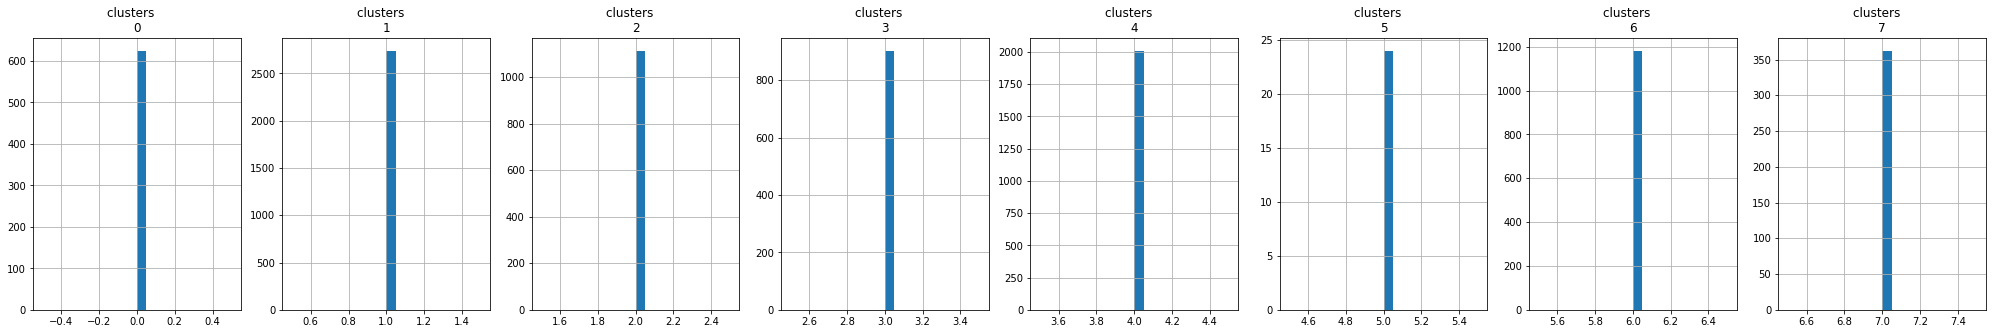

In [50]:
# Visualizamos histogramas para cada cluster 
for i in df.columns:
  plt.figure(figsize=(35,5))
  for j in range(0,8):
    plt.subplot(1,8,j+1)
    cluster = df[df['clusters'].isin([j])]
    cluster[i].hist(bins=20)
    plt.title(f"{i}   \n{j}")
  plt.show()

# TAREA 7: APLICAR ANÁLISIS DE LAS COMPONENTES PRINCIPALES Y VISUALIZAR LOS RESULTADOS 

![alt text](https://drive.google.com/uc?id=17b_4GsvzJmWt9cnPOcgSGmEelagGSbtL)

In [52]:
# Obtenemos las componentes principales
pca = PCA(n_components=2)
principal_components = pca.fit_transform(df_scaled)

In [59]:
# Creamos un dataframe con las dos componentes 
pca_df = pd.DataFrame(data=principal_components,columns=['PCA1','PCA2'])

In [62]:
# Concatenamos las etiquetas de los clusters con el dataframe de las componentes principales
pca_df['clusters'] = labels

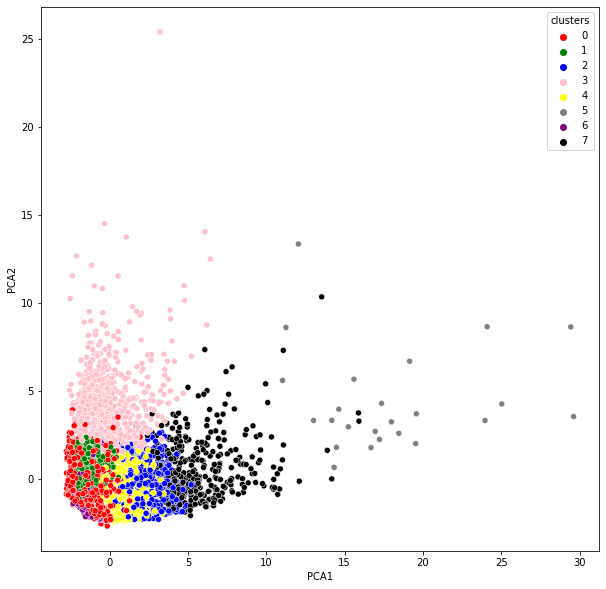

In [66]:
plt.figure(figsize=(10,10))
ax = sns.scatterplot(x='PCA1',y='PCA2',hue='clusters',data=pca_df,palette=['red','green','blue','pink','yellow','gray','purple','black'])
plt.show()

# TAREA #8: ENTENDER LA TEORÍA Y LA INTUICIÓN DETRÁS DE LOS AUTOENCODERS

![alt text](https://drive.google.com/uc?id=1kY4Ol3OvDd4IaFdrGXB8s-vAa1bhsT6V)

![alt text](https://drive.google.com/uc?id=1qtSiLgN_ZYWV_SPD79xpiapkbHxNmqvb)

![alt text](https://drive.google.com/uc?id=13sf_hXzpb2_bctB5EF7w-pXDV_72J95_)

# TAREA #9: APLICAR LOS AUTOENCODERS (REDUCIR LA DIMENSIÓN DE LOS DATOS CON LOS AUTOENCODERS)

In [67]:
from tensorflow.keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, Dropout
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.initializers import glorot_uniform #TOMAR DATOS ALEATORIOS CON DISTRIBUCION NORMAL TRUNCADA (xavier normal initializer)
from keras.optimizers import SGD #STOCHASTIC GRADIENT DESCENNT

In [70]:
encoding_dims = 7

#codificador
input_df = Input(shape= (17, ))
x = Dense(encoding_dims,activation='relu')(input_df)
x = Dense(500,activation='relu',kernel_initializer='glorot_uniform')(x)
x = Dense(500,activation='relu',kernel_initializer='glorot_uniform')(x)
x = Dense(2000,activation='relu',kernel_initializer='glorot_uniform')(x)
encoded = Dense(10,activation='relu',kernel_initializer='glorot_uniform')(x)

#descodificar
x = Dense(2000,activation='relu',kernel_initializer='glorot_uniform')(encoded)
x = Dense(500,activation='relu',kernel_initializer='glorot_uniform')(x)
decoded = Dense(17,kernel_initializer='glorot_uniform')(x)

#Modelos
autoencoder = Model(input_df,decoded)
encoder = Model(input_df,encoded)

#compilar
autoencoder.compile(optimizer='adam',loss='mean_squared_error')


In [71]:
autoencoder.summary()

Model: "functional_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 17)]              0         
_________________________________________________________________
dense_8 (Dense)              (None, 7)                 126       
_________________________________________________________________
dense_9 (Dense)              (None, 500)               4000      
_________________________________________________________________
dense_10 (Dense)             (None, 500)               250500    
_________________________________________________________________
dense_11 (Dense)             (None, 2000)              1002000   
_________________________________________________________________
dense_12 (Dense)             (None, 10)                20010     
_________________________________________________________________
dense_13 (Dense)             (None, 2000)             

In [72]:
autoencoder.fit(df_scaled,df_scaled,batch_size=128,epochs=25,verbose=1)

Epoch 1/25
70/70 [==============================] - 3s 40ms/step - loss: 0.5475
Epoch 2/25
70/70 [==============================] - 3s 40ms/step - loss: 0.3196
Epoch 3/25
70/70 [==============================] - 3s 40ms/step - loss: 0.2543
Epoch 4/25
70/70 [==============================] - 3s 40ms/step - loss: 0.1971
Epoch 5/25
70/70 [==============================] - 3s 40ms/step - loss: 0.1772
Epoch 6/25
70/70 [==============================] - 3s 42ms/step - loss: 0.1496
Epoch 7/25
70/70 [==============================] - 3s 41ms/step - loss: 0.1390
Epoch 8/25
70/70 [==============================] - 3s 41ms/step - loss: 0.1313
Epoch 9/25
70/70 [==============================] - 3s 41ms/step - loss: 0.1200
Epoch 10/25
70/70 [==============================] - 3s 41ms/step - loss: 0.1137
Epoch 11/25
70/70 [==============================] - 3s 40ms/step - loss: 0.1079
Epoch 12/25
70/70 [==============================] - 3s 40ms/step - loss: 0.1044
Epoch 13/25
70/70 [==================

In [73]:
autoencoder.save_weights('autoencoder.h5') #h5 estandard para guardar pesos

In [74]:
pred = encoder.predict(df_scaled)

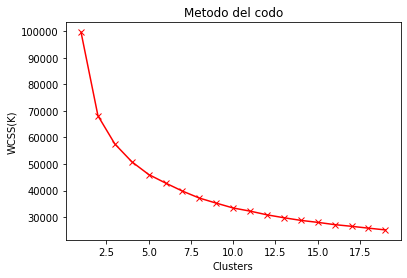

In [79]:
scores = list()
K_values = range(1,20)

for i in K_values:
  kmeans = KMeans(n_clusters=i)
  kmeans.fit(pred)
  scores.append(kmeans.inertia_)

plt.plot(K_values,scores,'rx-')
plt.title('Metodo del codo')
plt.xlabel('Clusters')
plt.ylabel('WCSS(K)')
plt.show()

In [86]:
kmeans = KMeans(4)
kmeans.fit(pred)
labels = kmeans.labels_
centers = kmeans.cluster_centers_

In [87]:
pca = PCA(n_components=2)
principal_components = pca.fit_transform(pred)
pca_df = pd.DataFrame(data=principal_components,columns=['PCA1','PCA2'])
pca_df['clusters'] = labels

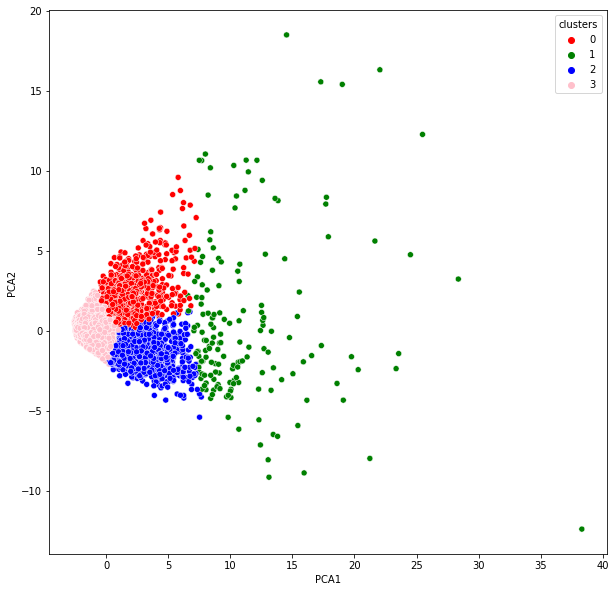

In [89]:
plt.figure(figsize=(10,10))
ax = sns.scatterplot(x='PCA1',y='PCA2',hue='clusters',data=pca_df,palette=['red','green','blue','pink'])
plt.show()

# ¡EXCELENTE TRABAJO! PUEDES ESTAR ORGULLOSO DE TUS HABILIDADES RECIEN ADQUIRIDAS